<a href="https://colab.research.google.com/github/PrabhakaranD/mobile_price_classification/blob/main/Mobile_price_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"get2jawa","key":"f5b57fa5433bcfdaf1fbe8d3222d5907"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
import kaggle

In [5]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 24.2MB/s]


In [6]:
!mkdir train
!unzip mobile-price-classification.zip -d train

Archive:  mobile-price-classification.zip
  inflating: train/test.csv          
  inflating: train/train.csv         


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
df_train = pd.read_csv('/content/train/train.csv')
df_test = pd.read_csv('/content/train/test.csv')

In [10]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [12]:
df_train.shape

(2000, 21)

In [13]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

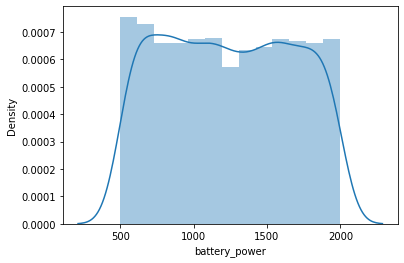

In [18]:
sns.distplot(df_train['battery_power'])

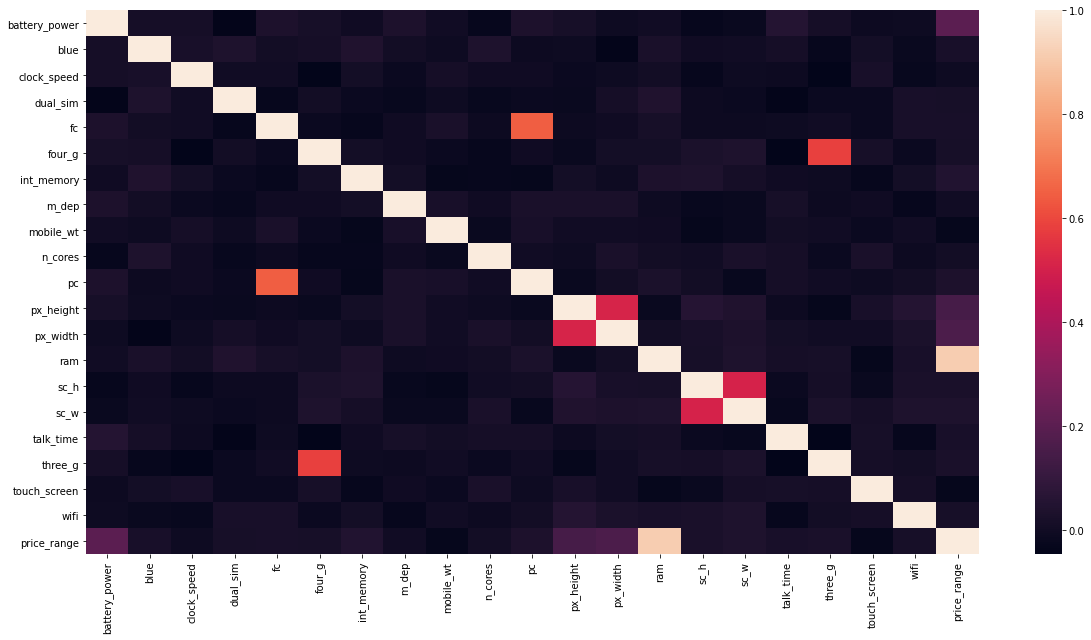

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr())
plt.show()

In [25]:
df_train['price_range'].unique()

array([1, 2, 3, 0])

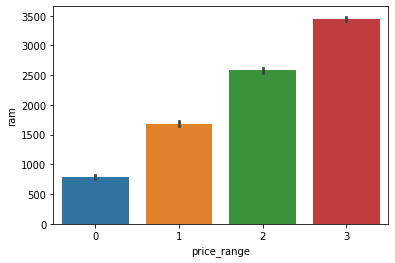

In [26]:
sns.barplot(x='price_range', y='ram', data=df_train)

In [29]:
df_train['three_g'].unique()

array([0, 1])

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
from sklearn.model_selection import train_test_split

In [35]:
X = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [36]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10 )

In [38]:
lr = LogisticRegression()

In [39]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
lr.classes_

array([0, 1, 2, 3])

In [42]:
lr.intercept_

array([ 7.40928347e-04,  1.81340686e-04, -9.09957716e-05, -8.31273262e-04])

In [43]:
lr.predict(X_test)

array([3, 3, 1, 3, 0, 3, 3, 3, 1, 3, 2, 3, 0, 2, 0, 3, 2, 3, 3, 2, 3, 3,
       0, 1, 0, 0, 2, 3, 1, 1, 2, 1, 2, 3, 2, 1, 1, 0, 3, 0, 3, 2, 2, 1,
       0, 3, 3, 0, 1, 1, 2, 2, 3, 3, 3, 3, 2, 3, 0, 0, 1, 1, 0, 0, 2, 0,
       2, 1, 2, 3, 2, 2, 0, 2, 2, 2, 3, 3, 2, 2, 3, 0, 1, 0, 1, 2, 1, 2,
       3, 3, 3, 2, 2, 3, 2, 1, 0, 1, 0, 1, 3, 0, 0, 3, 3, 3, 1, 0, 3, 3,
       2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 2, 1, 3, 2, 2, 3, 2, 3, 3, 0, 3, 3,
       3, 1, 1, 0, 1, 3, 3, 1, 3, 0, 3, 3, 1, 3, 2, 1, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 0, 2, 0, 1, 3, 3, 3, 1, 1, 1, 1, 2, 1, 2, 3, 2, 3, 0, 2,
       3, 3, 2, 1, 1, 2, 3, 3, 2, 0, 1, 3, 0, 3, 0, 2, 1, 3, 1, 0, 0, 1,
       0, 2, 0, 3, 3, 3, 1, 1, 3, 1, 2, 0, 3, 0, 1, 2, 2, 2, 2, 1, 2, 1,
       3, 1, 0, 3, 0, 2, 1, 1, 0, 1, 1, 1, 1, 3, 0, 1, 0, 2, 1, 3, 1, 2,
       0, 1, 0, 2, 3, 3, 0, 3, 2, 1, 0, 3, 3, 1, 2, 0, 1, 3, 2, 0, 1, 3,
       2, 3, 2, 0, 2, 1, 3, 2, 0, 3, 1, 3, 2, 1, 3, 0, 3, 3, 0, 0, 1, 1,
       2, 0, 0, 2, 1, 0, 1, 3, 1, 0, 2, 0, 0, 3, 0,

In [44]:
lr.score(X_test, y_test)

0.63

In [45]:
confusion_matrix(y_test, lr.predict(X_test))

array([[114,  24,   2,   0],
       [ 31,  87,  30,   9],
       [  1,  37,  73,  46],
       [  0,   1,  41, 104]])